In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!rm -rf '/content/cats_vs_dogs_small'
!rm -rf '/content/dogs_cats'

In [3]:
!unzip -qq '/content/drive/MyDrive/Colab_Notebooks/SECONDYEAR_TRIMESTER4_Module03_deep-learning-applications/DAY3_APPLICATION_OF_DEEP_LEARNING/dogs_cats.zip'

In [4]:
import os, shutil, pathlib

original_dir = pathlib.Path("dogs_cats/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,dst=dir / fname)
  
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [5]:
from keras import layers
from keras import models

train_dir="/content/cats_vs_dogs_small/train"
validation_dir="/content/cats_vs_dogs_small/validation"
test_dir = "/content/cats_vs_dogs_small/test"

This method allows Data Augmentation but should only be run on GPU

In [6]:
from keras.applications import VGG16

Just reuse the bottom convolutional base of VGG16 model as its more generic, top will be related to specific classes so not used

In [7]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

Adding a sequential model to top of conv_base

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

freeze the conv base. Freezing a layer means preventing their weights from being updated during training

In [9]:
print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

Validation Data Set should not be augmented

In [11]:

test_datagen = ImageDataGenerator(rescale=1./255)

Resize all images to 150x150

In [12]:
'''
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=2e-5),
metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)
'''

"\ntrain_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')\nvalidation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')\nfrom keras import optimizers\nmodel.compile(loss='binary_crossentropy',\noptimizer=optimizers.RMSprop(learning_rate=2e-5),\nmetrics=['acc'])\nhistory = model.fit(\ntrain_generator,\nsteps_per_epoch=100,\nepochs=30,\nvalidation_data=validation_generator,\nvalidation_steps=50)\n"

Freezing all the layers except a specific one

In [13]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [14]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
from keras import optimizers

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Fine Tuning the model

In [15]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-5),
metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 27s 219ms/step - loss: 0.5510 - acc: 0.7225 - val_loss: 0.3440 - val_acc: 0.8570
Epoch 2/100
100/100 [==============================] - 23s 233ms/step - loss: 0.3795 - acc: 0.8340 - val_loss: 0.2528 - val_acc: 0.8970
Epoch 3/100
100/100 [==============================] - 23s 230ms/step - loss: 0.3157 - acc: 0.8675 - val_loss: 0.2431 - val_acc: 0.8920
Epoch 4/100
100/100 [==============================] - 22s 216ms/step - loss: 0.2841 - acc: 0.8765 - val_loss: 0.2072 - val_acc: 0.9140
Epoch 5/100
100/100 [==============================] - 23s 230ms/step - loss: 0.2690 - acc: 0.8855 - val_loss: 0.1894 - val_acc: 0.9230
Epoch 6/100
100/100 [==============================] - 21s 214ms/step - loss: 0.2499 - acc: 0.8890 - val_loss: 0.2184 - val_acc: 0.9100
Epoch 7/100
100/100 [==============================] - 22s 222ms/step - loss: 0.2403 - acc: 0.8960 - val_loss: 0.1820 - val_acc: 0.9230
Epoch 8/100
100/100 [===========================

Plotting the results





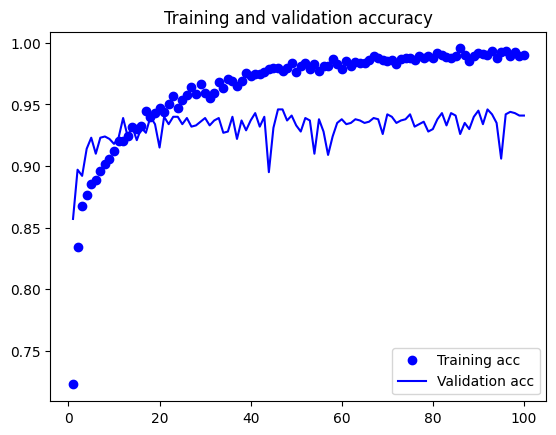

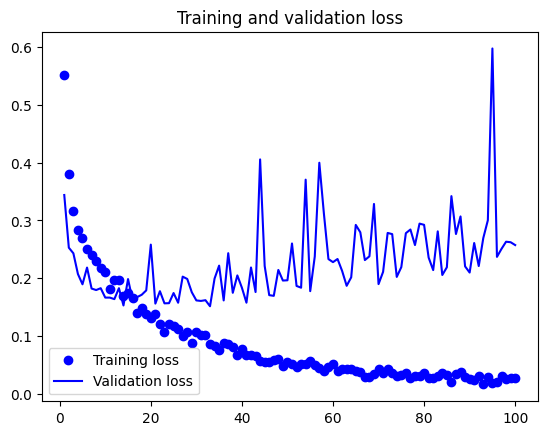

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
!jupyter nbconvert Keras_cats_dogs_convnet_pretrained_tuning.ipynb --to html